# Code printers

The most basic form of code generation are the code printers. The convert SymPy expressions into the target language. 

The most common languages are C, C++, Fortran, and Python, but over a dozen languages are supported. Here, we will quickly go over each supported language. 

In [1]:
from sympy import *
init_printing()

Let us use the function $$|\sin(x^2)|.$$

In [2]:
x = symbols('x')
expr = abs(sin(x**2))
expr

In [3]:
ccode(expr)

'fabs(sin(pow(x, 2)))'

In [4]:
fcode(expr)

'      abs(sin(x**2))'

In [5]:
julia_code(expr)

'abs(sin(x.^2))'

In [6]:
jscode(expr)

'Math.abs(Math.sin(Math.pow(x, 2)))'

In [7]:
mathematica_code(expr)

'Abs[Sin[x^2]]'

In [8]:
octave_code(expr)

'abs(sin(x.^2))'

In [9]:
from sympy.printing.rust import rust_code
rust_code(expr)

'(x.powi(2)).sin().abs()'

In [10]:
rcode(expr)

'abs(sin(x^2))'

In [11]:
from sympy.printing.cxxcode import cxxcode
cxxcode(expr)

'fabs(sin(std::pow(x, 2)))'

## Exercise: Plotting SymPy Functions with Javascript

One use case that works nicely with the Jupyter notebook is plotting mathematical functions using Javascript plotting libraries. There are a variety of plotting libraries available and the notebook makes it relatively easy to use. Here we will use [Chart.js](http://www.chartjs.org/) to plot functions of a single variable. We can use the `%%javascript` magic to type Javascript diretly into a notebook cell. In this cell we load in the Chart.js library:

In [12]:
%%javascript
require.config({
  paths: {
      'chartjs': '//cdnjs.cloudflare.com/ajax/libs/Chart.js/2.6.0/Chart'
  }
});

<IPython.core.display.Javascript object>

We've also prepared some Javascript to do the plotting. This code will take two mathematical expressions written in Javascript and plot the functions.

In [13]:
from scipy2017codegen.plotting import js_template

In [14]:
print(js_template.format(top_function='***fill me in!***',
                         bottom_function='***fill me in!***',
                         chart_id='***fill me in!***'))


require(['chartjs'], function(chartjs){

function f(x) {
    return ***fill me in!***
};

function g(x) {
    return ***fill me in!***
};

function linspace(a,b,n) {
    // From: https://gist.github.com/joates/6584908
    if(typeof n === "undefined") n = Math.max(Math.round(b-a)+1,1);
    if(n<2) { return n===1?[a]:[]; }
    var i,ret = Array(n);
    n--;
    for(i=n;i>=0;i--) { ret[i] = (i*b+(n-i)*a)/n; }
    return ret;
}

var ctx = document.getElementById("***fill me in!***");
var data = {
    labels: linspace(-7.5, 7.5, 500),
    datasets: [{
        label: "top",
        function: f,
        borderColor: "rgba(75, 192, 192, 1)",
        data: [],
        fill: false,
        lineTension: 0,
    },
    {
        label: "bottom",
        function: g,
        borderColor: "rgba(153, 102, 255, 1)",
        data: [],
        fill: false,
        lineTension: 0,
    }]
};

chartjs.Chart.pluginService.register({
    beforeInit: function(chart) {
        var data = chart.config.data;
   

Now SymPy functions can be plotted by filling in the two missing expressions in the above code and then calling the `Javascript` display function on that code.

In [15]:
from IPython.display import Javascript

In [16]:
x = symbols('x')
f1 = sin(x)
f2 = cos(x)

In [17]:
Javascript(js_template.format(top_function=jscode(f1),
                              bottom_function=jscode(f2),
                              chart_id='sincos'))

<IPython.core.display.Javascript object>

There are all kind of functions that can be plotted, but one particularly interesting set of functions are called the [Batman Equations](http://mathworld.wolfram.com/BatmanCurve.html). We've provided the piecewise versions of these functions written in SymPy below. Try plotting these with the JS plotter we've created.

In [18]:
from scipy2017codegen.plotting import batman_equations

In [19]:
top, bottom = batman_equations()

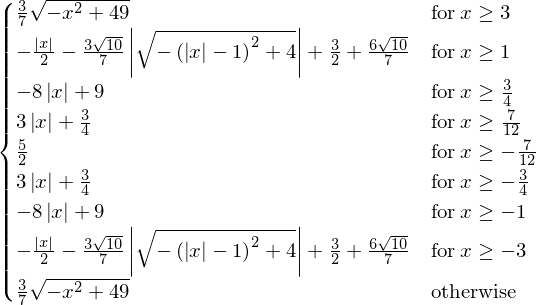

In [20]:
top

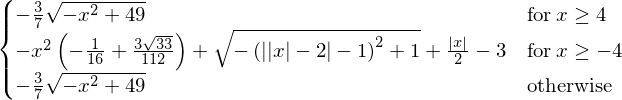

In [21]:
bottom

In [22]:
jscode(top)

'((x >= 3) ? (\n   (3/7)*Math.sqrt(-Math.pow(x, 2) + 49)\n)\n: ((x >= 1) ? (\n   -1/2*Math.abs(x) - 3/7*Math.sqrt(10)*Math.abs(Math.sqrt(-Math.pow(Math.abs(x) - 1, 2) + 4)) + 3/2 + (6/7)*Math.sqrt(10)\n)\n: ((x >= 3/4) ? (\n   -8*Math.abs(x) + 9\n)\n: ((x >= 7/12) ? (\n   3*Math.abs(x) + 3/4\n)\n: ((x >= -7/12) ? (\n   5/2\n)\n: ((x >= -3/4) ? (\n   3*Math.abs(x) + 3/4\n)\n: ((x >= -1) ? (\n   -8*Math.abs(x) + 9\n)\n: ((x >= -3) ? (\n   -1/2*Math.abs(x) - 3/7*Math.sqrt(10)*Math.abs(Math.sqrt(-Math.pow(Math.abs(x) - 1, 2) + 4)) + 3/2 + (6/7)*Math.sqrt(10)\n)\n: (\n   (3/7)*Math.sqrt(-Math.pow(x, 2) + 49)\n)))))))))'

In [23]:
jscode(bottom)

'((x >= 4) ? (\n   -3/7*Math.sqrt(-Math.pow(x, 2) + 49)\n)\n: ((x >= -4) ? (\n   -Math.pow(x, 2)*(-1/16 + (3/112)*Math.sqrt(33)) + Math.sqrt(-Math.pow(Math.abs(Math.abs(x) - 2) - 1, 2) + 1) + (1/2)*Math.abs(x) - 3\n)\n: (\n   -3/7*Math.sqrt(-Math.pow(x, 2) + 49)\n)))'

In [24]:
Javascript(js_template.format(top_function=jscode(top),
                              bottom_function=jscode(bottom),
                              chart_id='batman'))

<IPython.core.display.Javascript object>